# Lumber predictions
DIFA projekt von  Manuel Szecsenyi

## Ziel der Research
Dieses Projekt zielt darauf ab einen möglichen Zusammenhang zwischen den Preisen für Schnittholz und einem ausgewählten ETF (XHB) zu erkennen. Mit dem Resultat kann möglicherweise der Kurs von XHB durch die Beobachtung des "lumber" Preises vorhergesagt werden.

## Was ist "lumber"?
Lumber, zu Deutsch Schnittholz, ist eine Art von Holz, das für die Verwendung im Bauwesen und für andere Anwendungen verarbeitet und aufbereitet wurde. Es wird in der Regel aus Bäumen hergestellt, die gefällt, entrindet und in verschiedene Größen und Formen gesägt wurden, um den spezifischen Anforderungen eines bestimmten Projekts zu entsprechen. Schnittholz ist ein wichtiges Material in vielen verschiedenen Industriezweigen, wie z. B. der Zimmerei, dem Holzrahmenbau und dem Möbelbau, und wird zur Herstellung einer breiten Palette von Strukturen und Produkten verwendet. Obwohl es sich um eine wichtige natürliche Ressource handelt, kann die Produktion von Holz negative Auswirkungen auf die Umwelt haben, und es ist wichtig, es verantwortungsvoll und nachhaltig zu nutzen.

## Wie kann man in "lumber" investieren?
Es gibt mehrere Möglichkeiten zu investieren.

### Physisch
Eine relativ teure Investition ist der physische Erwerb von Schnittholz. Dabei wird das Holz direkt von Lieferanten gekauft und physisch an einem Lagerort verwahrt.

## Futures
Holz Futures sind Verträge, die es einen ermöglichen, Holz zu einem vorher festlegten Preis an einem bestimmten Tag in der Zukunft zu kaufen oder verkaufen. Future können auch spekulativ genutzt werden um auf ein fallen oder steigen des Preises vorherzusagen.

### Investition in Branchen/Unternehmen
Zuletzt kann auch in Unternehmen oder Branchen investiert werden, welche Holz produzieren, verarbeiten oder vertreiben. Das könnten zum Beispiel der XHB ETF sein welcher sich dieses Notebook versucht genauer anzuschauen.

## ETF XHB
Der SPDR S&P Homebuilders ETF (XHB) ist ein ETF der die Wertentwicklung des S&P Homebuilders Select Industry Index abbildet. Er setzt sich aus Unternehmen zusammen die mit der Produktion und dem Verkauf von Häusern und Material für den Hausbau beschäftigen.

## Futures contract spezifikationen
Im Folgenden sind einige übliche Elemente eines Futures-Contracts:
 - Die Art des gehandelten Vermögenswerts z.B. Holz, Weizen
 - Die Menge
 - Das Lieferdatum
 - Lieferort
 - Preis
 - Margin: Die Sicherheiten die beide Parteien hinterlegen müssen, um die Kursschwankungen auszugleichen
 - Lieferung

## Research

In [1]:
import numpy as np
!pip install yahoo_fin
!pip install matplotlib

You should consider upgrading via the '/Users/manuel/projects/lumber-predictions/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/manuel/projects/lumber-predictions/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import yahoo_fin as yf
from yahoo_fin.stock_info import get_data
import pandas as pd

In [3]:
# GET XHB DATA
xhb = get_data('XHB', start_date = "2011-07-21", end_date = "2021-07-21")

# Get wood prices
wood = get_data('WOOD', start_date = "2011-07-21", end_date = "2021-07-21")

In [4]:
# Check data
wood.head()

,open,high,low,close,adjclose,volume,ticker
2011-07-21,43.160000,43.540001,43.139999,43.490002,35.668331,8800,WOOD
2011-07-22,43.330002,43.330002,43.060001,43.139999,35.381279,63100,WOOD
2011-07-25,42.770000,43.189999,42.770000,43.000000,35.266449,23200,WOOD
2011-07-26,42.959999,43.049999,42.740002,42.759998,35.069622,29100,WOOD
2011-07-27,42.480000,42.799999,41.700001,41.830002,34.306889,41700,WOOD


In [5]:
# Just get the close price
woodClose = wood.close
xhbClose = xhb.close

In [6]:
# Merge series
history = pd.concat([woodClose.rename('Wood Close'), xhbClose.rename('XHB Close')], axis=1)
history.head()

,Wood Close,XHB Close
2011-07-21,43.490002,17.860001
2011-07-22,43.139999,17.700001
2011-07-25,43.000000,17.500000
2011-07-26,42.759998,17.270000
2011-07-27,41.830002,16.850000


<AxesSubplot: >

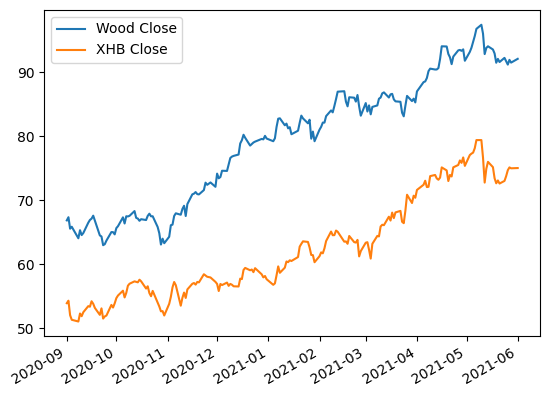

In [7]:
history["2020-09-01":"2021-06-01"].plot()

In [8]:
windows = (30, 90)
ema = pd.DataFrame(index=history.index)

In [9]:
ema.head()

""
2011-07-21
2011-07-22
2011-07-25
2011-07-26
2011-07-27


In [10]:
#https://www.statology.org/exponential-moving-average-pandas/
ema["short"] = wood.close.ewm(span=windows[0], adjust=False).mean()
ema["long"] = wood.close.ewm(span=windows[1], adjust=False).mean()
ema.dropna(inplace=True)

ema.head()

,short,long
2011-07-21,43.490002,43.490002
2011-07-22,43.467421,43.482309
2011-07-25,43.437265,43.471709
2011-07-26,43.393570,43.456067
2011-07-27,43.292695,43.420329


In [11]:
ema['difference'] = ema.long - ema.short
ema

,short,long,difference
2011-07-21,43.490002,43.490002,0.000000
2011-07-22,43.467421,43.482309,0.014888
2011-07-25,43.437265,43.471709,0.034444
2011-07-26,43.393570,43.456067,0.062497
2011-07-27,43.292695,43.420329,0.127635
...,...,...,...
2021-07-14,88.264871,87.776247,-0.488625
2021-07-15,88.202622,87.765780,-0.436842
2021-07-16,88.050840,87.723675,-0.327165
2021-07-19,87.771431,87.635682,-0.135749


In [12]:
buy_signals = ema.index[(np.sign(ema.difference.shift(1)) == 1) & (np.sign(ema.difference) == -1)]
sell_signals = ema.index[(np.sign(ema.difference.shift(1)) == -1) & (np.sign(ema.difference) == 1)]

In [13]:
buy_signals

DatetimeIndex(['2012-01-17', '2012-08-16', '2013-07-26', '2014-05-29',
               '2014-09-11', '2014-11-13', '2015-11-23', '2016-04-13',
               '2016-07-19', '2019-10-16', '2020-06-18'],
              dtype='datetime64[ns]', freq=None)

<AxesSubplot: >

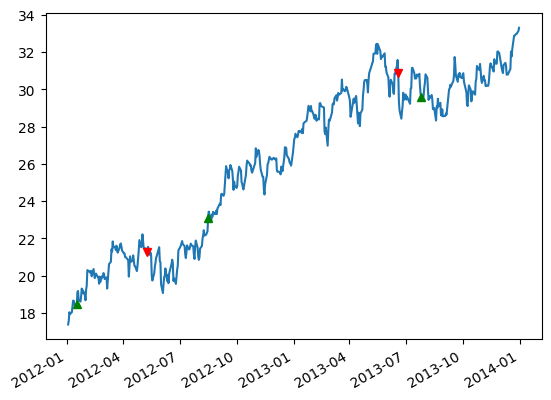

In [14]:
ax = history['XHB Close'].loc["2012-01-01":"2014-01-01"].plot()
history['XHB Close'][buy_signals].loc["2012-01-01":"2014-01-01"].plot(ax=ax, style="g^")
history['XHB Close'][sell_signals].loc["2012-01-01":"2014-01-01"].plot(ax=ax, style="rv")

## Conclusio
Das oben stehende Diagram kann wie folgt interpretiert werden. Die Pfeile zeigen Transaktion an. Grün wäre Kaufen und Rot verkaufen bzw. ein Wetten auf den Kurs. In den ausgewählten Zeitraum kann tatsächlich eine Correlation festgehalten werden. Fraglich ist, ob diese auch in Zukunft gelten wird oder dies nur mit dem gewählten Zeitraum übereinstimmt.

## Quellen
https://www.youtube.com/watch?v=QwZWcrIiY1s&t=618s
https://www.quantconnect.com/forum/discussion/12040/idea-streams-14-predicting-homebuilder-performance-from-timber-stock-prices